# Covid Data Analysis

We will be looking at some Covid data

## Imports

In [206]:
import pandas as pd
import numpy as np
import re

# load packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator # We will need functions from ticker sub package

import numpy as np

# modify global matplotlib settings
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [52]:
# Programs to pull hospital Covid case counts by public health unit

def clean_data(covid_df):
    # Remove '_' from columns
    covid_df.columns = [re.sub("_", " ", x) for x in covid_df.columns]
    # Set date column as index column
    if 'Date' in covid_df.columns:
        covid_df = covid_df.set_index('Date')
    if 'Total' in covid_df.columns:
        covid_df = covid_df.drop(columns = 'Total')
    covid_df.index = [pd.Timestamp(x) for x in covid_df.index]
    return covid_df

def download_data():
    covid_df = pd.read_csv("https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv")
    return clean_data(covid_df)

def save_data(covid_df):
    covid_df.to_csv("Covid Data/covid_by_phu.csv")
     
def load_folder_data():
    covid_df = pd.read_csv("Covid Data/covid_by_phu.csv",index_col=0)
    #covid_df.index = [pd.Timestamp(x) for x in covid_df.index]
    return clean_data(covid_df)

    #Clean data
    #covid_df['Date'] = covid_df['Date'].apply(pd.Timestamp())
    covid_df = covid_df.set_index('Date')
    return covid_df

In [53]:
covid_data = download_data() # LOAD DATA FROM ONLINE DATASET
covid_data = load_folder_data() # LOAD SAVED DATA FROM FOLDER
save_data(covid_data) # SAVE DATA TO FOLDER

covid_data.head()

,Algoma District,Brant County,Chatham Kent,Durham Region,Eastern Ontario,Grey Bruce,Haldimand Norfolk,Haliburton Kawartha Pine Ridge,Halton Region,City of Hamilton,...,Renfrew County and District,Simcoe Muskoka District,Southwestern,Sudbury and District,Thunder Bay District,Timiskaming,Toronto,Wellington Dufferin Guelph,Windsor Essex County,York Region
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# 
def get_timeperiod(month, year):
    if month <= 6:
        return (year-1,year)
    else:
        return (year,year+1)
    
def month_postitions(month):
    if month < 7:
        return month+5
    else:
        return month-7

In [108]:
df_covid_dict = {phu:covid_data[[phu]].copy() for phu in covid_data.columns}

data_dict = {}
for phu, df in df_covid_dict.items():
    df['year'] = [x.year for x in df.index]
    df['month'] = [x.month for x in df.index]
    
    # if month is <=6, period = [year-1 : year] else [year:year+1]
    # i.e. Jan 2023 and Dec 2022 would be in (2022, 2023) period
    df['period'] = [get_timeperiod(month, year) for month, year in zip(df['month'], df['year'])]
    #df['period'] = [2020,2021,2022]
    # Get data ready
    df_pivot = df.pivot_table(index='month', columns='period', aggfunc='sum', values=phu)
    df_pivot = df_pivot.loc[[7,8,9,10,11,12,1,2,3,4,5,6]]
    df_pivot.iloc[:, :-1] = df_pivot.iloc[:, :-1].fillna(0)
    df_pivot.index = [month_postitions(m) for m in df_pivot.index]
    data_dict[phu] = df_pivot
    

In [109]:
#[month_postitions(m) for m in df_pivot.index]
df_pivot

period,"(2019, 2020)","(2020, 2021)","(2021, 2022)","(2022, 2023)"
0,0.0,277.0,293.0,3934.0
1,0.0,201.0,1799.0,3002.0
2,0.0,824.0,1774.0,2171.0
3,0.0,2577.0,1038.0,2233.0
4,0.0,4219.0,1258.0,1766.0
5,0.0,6815.0,15540.0,2028.0
6,0.0,7726.0,21336.0,1385.0
7,6.0,3219.0,3110.0,NaN
8,369.0,5161.0,3287.0,NaN
9,1257.0,12361.0,5996.0,NaN


In [97]:
def month_postitions(month):
    if month < 7:
        return month+5
    else:
        return month-7

In [106]:
years

array(['2020', '2021', '2022', '2023', 'o'], dtype='<U11')

In [111]:
data

period,"(2019, 2020)","(2020, 2021)","(2021, 2022)","(2022, 2023)"
0,0.0,3.0,5.0,353.0
1,0.0,1.0,28.0,416.0
2,0.0,5.0,36.0,445.0
3,0.0,11.0,72.0,957.0
4,0.0,16.0,619.0,345.0
5,0.0,12.0,1043.0,218.0
6,0.0,94.0,1553.0,187.0
7,0.0,32.0,1438.0,NaN
8,6.0,30.0,1510.0,NaN
9,7.0,106.0,1291.0,NaN


In [146]:
12%12

0

[2020 2021 2022 2023]


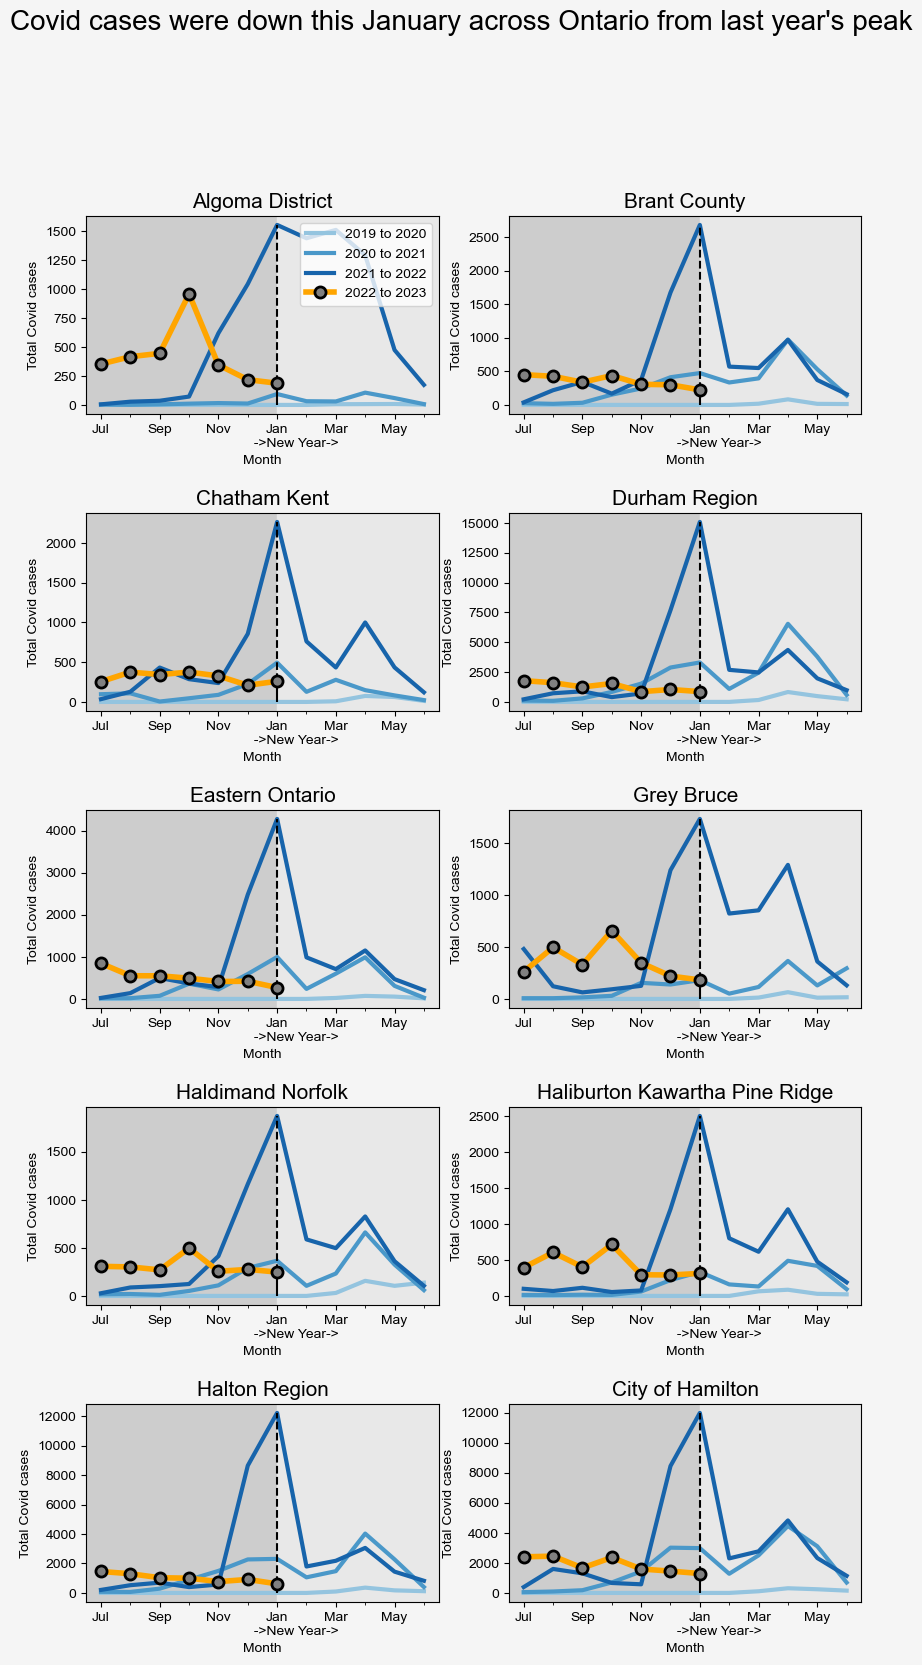

In [240]:
# Set 5x2 figure
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(10,18), gridspec_kw={'wspace':0.2,'hspace':0.5})

# grab list of max years (i.e. for (2019,2020) grab 2020)
years = np.array([x[1] for x in df_pivot.columns])
print(years)

month_list = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan\n          ->New Year->', 'Feb', 'Mar', 'Apr', "May", 'Jun']

#Set color map
cmap = mpl.colormaps['Blues']

# Set lowest value of color map (otherwise )
def year_to_color(x, low=0.4):
    cmap_number = cmap(1/(years.max() - years.min()) * (x - years.min()))
    return cmap((1-low)*(x-years.max())/(years.max()-years.min()) + 1)

# Set line color for current year
current_year_color = mpl.colors.rgb2hex((254/255,210/255,4/255))

#list of public health units
phu_select = list(data_dict.keys())
for i in range(0,5):
    for j in range (0,2):
        ax = axes[i,j]
        #print(phu)
        phu = phu_select[j+2*i]
        #print(phu)
        data = data_dict[phu]
        #print(data.iloc[0])

        x = data.index
        for year in years:
            if year < years.max():
                y = data[(year-1, year)]
                ax.plot(x,y,marker='',markersize=8,markerfacecolor='yellow',markeredgecolor='black',markeredgewidth=2,
                linestyle='-',linewidth=3,zorder=2,label=year, color=year_to_color(year))
            else:
                y = data[(year-1, year)].dropna()
                x = list(x[0:len(y)])
                #if len(y) < 12:
                #    x.append(len(y)+1)
                #    y.loc[len(y)+1] = 0
                ax.plot(x,y,marker='o',markersize=8,markerfacecolor='grey',markeredgecolor='black',markeredgewidth=2,
                linestyle='-',linewidth=4,zorder=2.2,label=year, color= 'orange') #current_year_color)
        
        if i == 0 and j == 0:
            ax.legend(labels = [f'{x[0]} to {x[1]}' for x in data.columns],
                      loc='upper right',
                      bbox_to_anchor=(1,1))
        #ax.x
        ax.set_title(f"{phu}", fontsize=15)   
        ax.set_ylabel("Total Covid cases")
        ax.set_xlabel("Month")
        #ax.axvline(x=6,linewidth=1, zorder=1.9, color='grey')
        
        # We want to draw a line between covid cases for the current month and year versus the same month last year
        final_year_df = data.dropna().iloc[:, -1]
        final_month = final_year_df.index[-1]
        final_value = final_year_df.iloc[-1]

        prev_year_df = data.iloc[:, -2]
        prev_value = prev_year_df.loc[final_month]


        
    
        ax.vlines(6,ymin=final_value, ymax=prev_value, colors='black', linestyle='--',zorder=2.1)
        ax.vlines(6,ymin=0, ymax=final_value, colors='black', zorder=2.1)
        ax.axvspan(6, 13, color=mpl.colors.rgb2hex((232/255,232/255,232/255)))
        ax.set(xlim=[-0.5,11.5])
        ax.xaxis.set_major_locator(MultipleLocator(2))
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        #ax.xaxis.set_major_formatter(
        #    lambda x, pos: ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan\n(New Year)', 'Feb' 'Mar', 'Apr', "May"][int(x)])
        ax.xaxis.set_major_formatter(lambda x, pos: month_list[int(x)%12])
        
        ax.set_facecolor(mpl.colors.rgb2hex((205/255,205/255,205/255)))

fig.set_facecolor((mpl.colors.rgb2hex((245/255,245/255,245/255))))
fig.suptitle("Covid cases were down this January across Ontario from last year's peak", verticalalignment='bottom', fontsize=20)
fig.savefig('Covid cases are down Jan centered.png')

In [209]:
f'{round(final_value/prev_value*100)}%'

'11%'

[2020 2021 2022 2023]


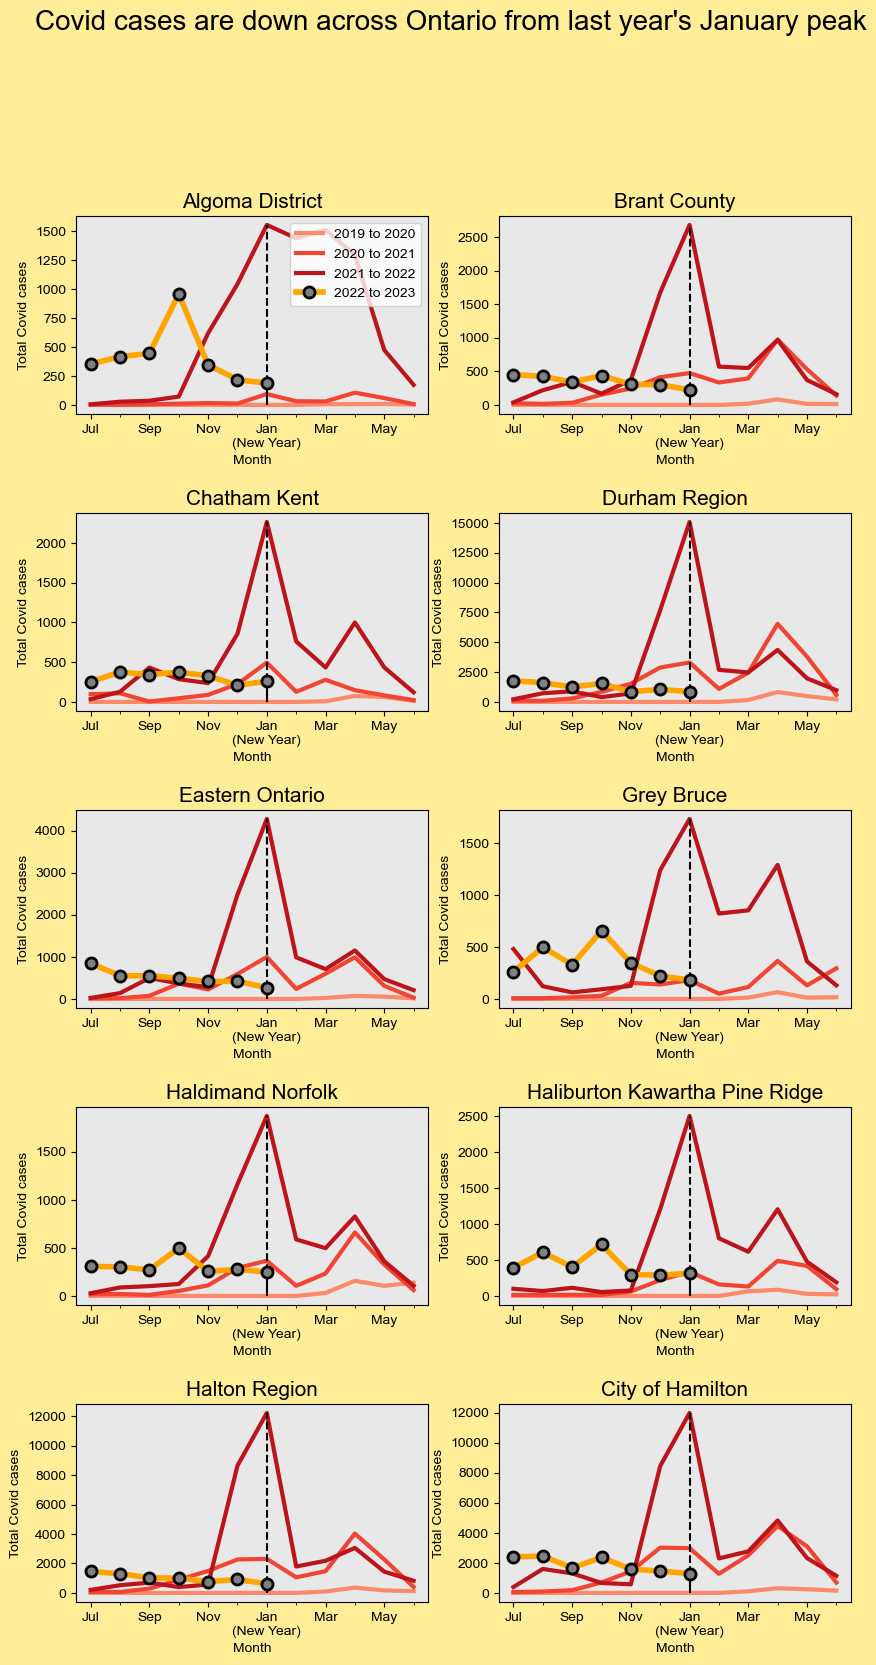

In [232]:
# Set 5x2 figure
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(10,18), gridspec_kw={'wspace':0.2,'hspace':0.5})

# grab list of max years (i.e. for (2019,2020) grab 2020)
years = np.array([x[1] for x in df_pivot.columns])
print(years)

month_list = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan\n(New Year)', 'Feb', 'Mar', 'Apr', "May", 'Jun']

#Set color map
cmap = mpl.colormaps['Reds']

# Set lowest value of color map (otherwise )
def year_to_color(x, low=0.4):
    cmap_number = cmap(1/(years.max() - years.min()) * (x - years.min()))
    return cmap((1-low)*(x-years.max())/(years.max()-years.min()) + 1)

# Set line color for current year
current_year_color = mpl.colors.rgb2hex((22/255,101/255,168/255))

#list of public health units
phu_select = list(data_dict.keys())
for i in range(0,5):
    for j in range (0,2):
        ax = axes[i,j]
        #print(phu)
        phu = phu_select[j+2*i]
        #print(phu)
        data = data_dict[phu]
        #print(data.iloc[0])

        x = data.index
        for year in years:
            if year < years.max():
                y = data[(year-1, year)]
                ax.plot(x,y,marker='',markersize=8,markerfacecolor='yellow',markeredgecolor='black',markeredgewidth=2,
                linestyle='-',linewidth=3,zorder=2,label=year, color=year_to_color(year))
            else:
                y = data[(year-1, year)].dropna()
                x = list(x[0:len(y)])
                #if len(y) < 12:
                #    x.append(len(y)+1)
                #    y.loc[len(y)+1] = 0
                ax.plot(x,y,marker='o',markersize=8,markerfacecolor='grey',markeredgecolor='black',markeredgewidth=2,
                linestyle='-',linewidth=4,zorder=2.2,label=year, color= 'orange') #current_year_color)
        
        if i == 0 and j == 0:
            ax.legend(labels = [f'{x[0]} to {x[1]}' for x in data.columns],
                      loc='upper right',
                      bbox_to_anchor=(1,1))
        #ax.x
        ax.set_title(f"{phu}", fontsize=15)   
        ax.set_ylabel("Total Covid cases")
        ax.set_xlabel("Month")
        #ax.axvline(x=6,linewidth=1, zorder=1.9, color='grey')
        
        # We want to draw a line between covid cases for the current month and year versus the same month last year
        final_year_df = data.dropna().iloc[:, -1]
        final_month = final_year_df.index[-1]
        final_value = final_year_df.iloc[-1]

        prev_year_df = data.iloc[:, -2]
        prev_value = prev_year_df.loc[final_month]


        
    
        ax.vlines(6,ymin=final_value, ymax=prev_value, colors='black', linestyle='--',zorder=2.1)
        ax.vlines(6,ymin=0, ymax=final_value, colors='black', zorder=2.1)
        ax.axvspan(6, 13, color=mpl.colors.rgb2hex((232/255,232/255,232/255)))
        ax.set(xlim=[-0.5,11.5])
        ax.xaxis.set_major_locator(MultipleLocator(2))
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        #ax.xaxis.set_major_formatter(
        #    lambda x, pos: ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan\n(New Year)', 'Feb' 'Mar', 'Apr', "May"][int(x)])
        ax.xaxis.set_major_formatter(lambda x, pos: month_list[int(x)%12])
        
        ax.set_facecolor(mpl.colors.rgb2hex((232/255,232/255,232/255)))

fig.set_facecolor((mpl.colors.rgb2hex((255/255,237/255,151/255))))

fig.suptitle("Covid cases are down across Ontario from last year's January peak", verticalalignment='bottom', fontsize=20)
fig.savefig('Covid cases are down Jan centered alt color.png')

In [78]:
[x[1] for x in df_pivot.columns]

[2020, 2021, 2022, 2023]

In [83]:
np.array(years).max()

2023

In [88]:
data[(year-1, year)]

month
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
1     0.0
2     0.0
3     6.0
4     7.0
5     8.0
6     3.0
Name: (2019, 2020), dtype: float64

In [72]:
df_pivot

period,"(2019, 2020)","(2020, 2021)","(2021, 2022)","(2022, 2023)"
month,,,,
7,0.0,277.0,293.0,3934.0
8,0.0,201.0,1799.0,3002.0
9,0.0,824.0,1774.0,2171.0
10,0.0,2577.0,1038.0,2233.0
11,0.0,4219.0,1258.0,1766.0
12,0.0,6815.0,15540.0,2028.0
1,0.0,7726.0,21336.0,1385.0
2,6.0,3219.0,3110.0,NaN
3,369.0,5161.0,3287.0,NaN


In [70]:
df_pivot = df.pivot_table(index='month', columns='period', aggfunc='sum', values=phu)
df_pivot = df_pivot.loc[[7,8,9,10,11,12,1,2,3,4,5,6]]
df_pivot.iloc[:, :-1] = df_pivot.iloc[:, :-1].fillna(0)
df_pivot

period,"(2019, 2020)","(2020, 2021)","(2021, 2022)","(2022, 2023)"
month,,,,
7,0.0,277.0,293.0,3934.0
8,0.0,201.0,1799.0,3002.0
9,0.0,824.0,1774.0,2171.0
10,0.0,2577.0,1038.0,2233.0
11,0.0,4219.0,1258.0,1766.0
12,0.0,6815.0,15540.0,2028.0
1,0.0,7726.0,21336.0,1385.0
2,6.0,3219.0,3110.0,NaN
3,369.0,5161.0,3287.0,NaN


In [30]:
covid_data['year'] = [x.year for x in covid_data.index]
covid_data['month'] = [x.month for x in covid_data.index]
covid_data

,Algoma District,Brant County,Chatham Kent,Durham Region,Eastern Ontario,Grey Bruce,Haldimand Norfolk,Haliburton Kawartha Pine Ridge,Halton Region,City of Hamilton,...,Sudbury and District,Thunder Bay District,Timiskaming,Toronto,Wellington Dufferin Guelph,Windsor Essex County,York Region,Total,year,month
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,2020,1
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2020,1
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2020,1
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2020,1
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-21,9,4,3,41,22,8,2,6,12,22,...,12,9,1,122,7,20,36,653,2023,1
2023-01-22,7,6,7,20,7,7,4,6,15,34,...,17,9,2,109,8,12,36,511,2023,1
2023-01-23,13,4,7,29,8,5,12,13,25,22,...,6,25,2,107,11,31,40,656,2023,1
2023-01-24,12,16,12,27,5,10,11,16,28,42,...,20,16,3,170,19,36,45,858,2023,1


In [20]:
date_start = pd.Timestamp(2022,6,1)
date_end = pd.Timestamp(2023,6,1)



covid_data.loc['2021-06-1':'2022-06-1']

,Algoma District,Brant County,Chatham Kent,Durham Region,Eastern Ontario,Grey Bruce,Haldimand Norfolk,Haliburton Kawartha Pine Ridge,Halton Region,City of Hamilton,...,Simcoe Muskoka District,Southwestern,Sudbury and District,Thunder Bay District,Timiskaming,Toronto,Wellington Dufferin Guelph,Windsor Essex County,York Region,Total
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-10,0,12,0,42,0,4,0,2,25,31,...,23,3,1,5,0,80,3,10,36,511
2021-06-11,1,4,0,23,4,5,3,3,11,31,...,14,2,6,0,0,87,5,7,25,521
2021-06-12,0,3,1,20,1,4,2,2,14,6,...,7,1,0,5,0,67,8,6,12,434
2021-06-13,0,3,0,21,0,6,1,4,12,15,...,12,7,0,2,0,86,6,4,9,350
2021-06-14,0,3,0,13,1,1,3,1,18,7,...,4,7,4,4,0,70,2,10,12,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-05,3,1,1,20,5,11,3,1,15,10,...,17,4,7,14,0,97,6,9,60,463
2022-06-06,4,5,4,26,3,5,1,6,26,26,...,31,5,13,23,3,220,15,13,66,756
2022-06-07,8,4,4,40,3,5,7,16,33,45,...,37,10,16,30,3,225,9,20,97,956
